# Статистики за корона вирусот во Македонија

In [110]:
import pandas as pd
import nbinteract as nbi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

import statistics_methods

%matplotlib inline

In [ ]:
all_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

all_data.head()

In [23]:
def get_data_for_country(data, name):
    res = statistics_methods.get_data_by_country_name(data=data, country_column='Country/Region', country_name=name)
    res = statistics_methods.convert_data_in_day_count_larger_than_zero_format(data=res, id_vars=res.columns[1 : 4], value_vars=res.columns[4:], var_name='date', value_name='count')
    return res

In [122]:
def get_data_for_countries(data, countries):
    data = [get_data_for_country(data, country) for country in countries]
    lengths = [len(country_data) for country_data in data]
    comparable_days_count = max(lengths)
#     interesting_data = pd.concat([country_data.iloc[:comparable_days_count] for country_data in data])
    return data, comparable_days_count

def draw_line_plot(data, day_range, figure):
    plt.axes.Axes.clear()
    from_day = day_range[0]
    to_day = day_range[1]
    print(from_day)
    interesting_data = pd.concat([country_data.loc[(country_data['artificial_day'] >= from_day) & 
                                                   (country_data['artificial_day'] <= to_day)] 
                                  for country_data in data])
    line_plot = sns.lineplot(x="artificial_day", y="count", hue='Country/Region', data=interesting_data, ax=plt.axes())

    line_plot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    line_plot.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))


In [123]:
interesting_data, max_days = get_data_for_countries(all_data, countries=['North Macedonia', 'Spain', 'Croatia', 'Romania'])

figure = plt.figure(figsize=(15,10))

day_range_chooser = widgets.IntRangeSlider(
    value=[1, 10],
    min=1,
    max=max_days,
    step=1,
    description='Избери за кои денови:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

display(day_range_chooser)

def on_values_change(change):
    draw_line_plot(interesting_data, change['new'], figure)


draw_line_plot(interesting_data, (1, 10), figure)
day_range_chooser.observe(on_values_change, names='value')



# interact(draw_line_plot, day_range_chooser)
# line_plot.set_xticklabels(line_plot.get_xticklabels(), rotation=45)
# line_plot.xaxis.set_major_locator(ticker.MultipleLocator(2))

IntRangeSlider(value=(1, 10), continuous_update=False, description='Избери за кои денови:', max=45, min=1)

AttributeError: 'function' object has no attribute 'Axes'

<Figure size 1080x720 with 0 Axes>

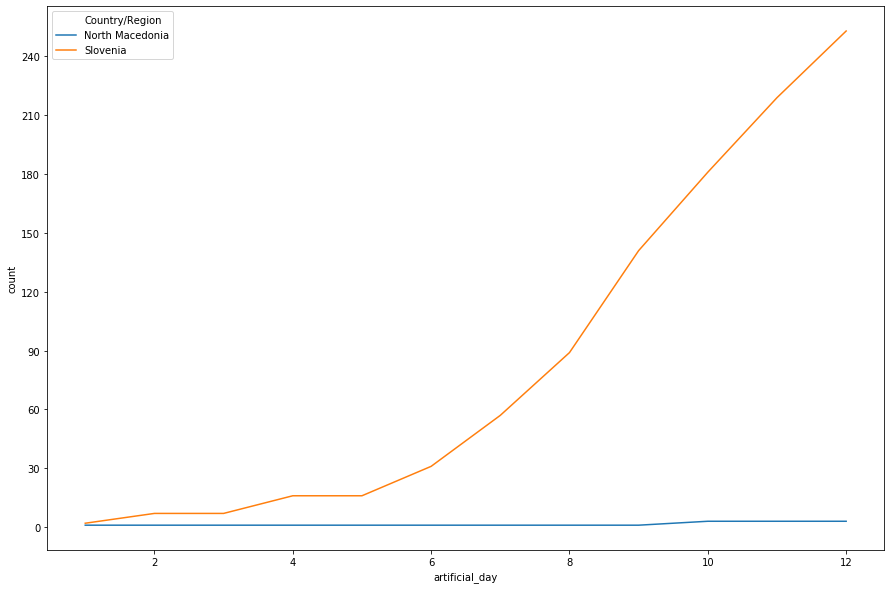

In [49]:
interesting_data = get_data_for_countries(all_data, countries=['North Macedonia', 'Albania', 'Latvia', 'Slovenia'])
plt.figure(figsize=(15,10))
line_plot = sns.lineplot(x="artificial_day", y="count", hue='Country/Region', data=interesting_data)

line_plot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
line_plot.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# line_plot.set_xticklabels(line_plot.get_xticklabels(), rotation=45)
# line_plot.xaxis.set_major_locator(ticker.MultipleLocator(2))

In [66]:
get_max_count_data_by_group(data=interesting_data, group_property='Country/Region')

interesting_data

                 artificial_day  Lat  Long  date  count
Country/Region                                         
Croatia                      20   20    20    20     20
North Macedonia              20   20    20    20     20
Romania                      20   20    20    20     20
Spain                        20   20    20    20     20


,artificial_day,Country/Region,Lat,Long,date,count
0,1,North Macedonia,41.6086,21.7453,2/26/20,1
1,2,North Macedonia,41.6086,21.7453,2/27/20,1
2,3,North Macedonia,41.6086,21.7453,2/28/20,1
3,4,North Macedonia,41.6086,21.7453,2/29/20,1
4,5,North Macedonia,41.6086,21.7453,3/1/20,1
...,...,...,...,...,...,...
15,16,Romania,45.9432,24.9668,3/12/20,49
16,17,Romania,45.9432,24.9668,3/13/20,89
17,18,Romania,45.9432,24.9668,3/14/20,123
18,19,Romania,45.9432,24.9668,3/15/20,131
